## This project involves finding optimal locations for opening new fitness centers in America based on available health and location data.

Download the dataset containing health statistics (among other things) for each county in America. Since it's an Excel file, the "HEALTH" spreadsheet is opened.

In [1]:
import pandas as pd
df_health = pd.read_excel("https://www.ers.usda.gov/webdocs/DataFiles/48731/DataDownload.xls?v=0/food_environment_atlas.xlsx", sheet_name = "HEALTH")
df_health

,FIPS,State,County,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,PCT_HSPA15,RECFAC09,RECFAC14,PCH_RECFAC_09_14,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14
0,1001,AL,Autauga,11.4,13.0,31.5,34.1,25.4,4,5,25.000000,0.073889,0.090261,22.156783
1,1003,AL,Baldwin,9.8,10.4,26.2,27.4,25.4,18,25,38.888889,0.100331,0.124931,24.518392
2,1005,AL,Barbour,13.6,18.4,37.6,44.4,25.4,1,0,-100.000000,0.036157,0.000000,-100.000000
3,1007,AL,Bibb,11.1,14.8,32.3,40.3,25.4,1,1,0.000000,0.043590,0.044433,1.932818
4,1009,AL,Blount,11.4,14.1,31.9,34.6,25.4,3,3,0.000000,0.052319,0.051976,-0.654897
5,1011,AL,Bullock,14.9,19.6,37.8,43.0,25.4,0,0,0.000000,0.000000,0.000000,0.000000
6,1013,AL,Butler,15.1,17.7,36.8,36.3,25.4,0,1,NaN,0.000000,0.049271,NaN
7,1015,AL,Calhoun,14.5,14.9,33.5,32.2,25.4,7,7,0.000000,0.059140,0.060389,2.111011
8,1017,AL,Chambers,16.1,16.4,35.5,39.7,25.4,2,0,-100.000000,0.058167,0.000000,-100.000000
9,1019,AL,Cherokee,13.6,13.3,31.5,33.6,25.4,1,1,0.000000,0.038679,0.038407,-0.702846


Drop unnecessary columns, in this case "PCT_HSPA15" (% high schoolers physically active, 2015), "RECFACPTH09" (Recreation and fitness facilities / 1000 pop, 2009), "RECFACPTH14" (Recreation and fitness facilities / 1000 pop, 2014), "PCH_RECFACPTH_09_14" (% change in recreation and fitness facilities /1000 pop, 2009-2014)

In [2]:
df_health.drop(["PCT_HSPA15", "RECFACPTH09", "RECFACPTH14", "PCH_RECFACPTH_09_14"], axis = 1, inplace = True)
df_health.head()

,FIPS,State,County,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,RECFAC09,RECFAC14,PCH_RECFAC_09_14
0,1001,AL,Autauga,11.4,13.0,31.5,34.1,4,5,25.000000
1,1003,AL,Baldwin,9.8,10.4,26.2,27.4,18,25,38.888889
2,1005,AL,Barbour,13.6,18.4,37.6,44.4,1,0,-100.000000
3,1007,AL,Bibb,11.1,14.8,32.3,40.3,1,1,0.000000
4,1009,AL,Blount,11.4,14.1,31.9,34.6,3,3,0.000000


Rename columns so they make more sense:

In [3]:
df_health.columns = ["FIPS", "State", "County", "Adult Diabetes Rate (2008)", "Adult Diabetes Rate (2013)", "Adult Obesity Rate (2008)",
                     "Adult Obesity Rate (2013)","Recreation/Fitness Facilities (2009)", "Recreation/Fitness Facilities (2014)",
                     "Recreation/Fitness Facilities % Change (2009-2014)"]
df_health.head()

,FIPS,State,County,Adult Diabetes Rate (2008),Adult Diabetes Rate (2013),Adult Obesity Rate (2008),Adult Obesity Rate (2013),Recreation/Fitness Facilities (2009),Recreation/Fitness Facilities (2014),Recreation/Fitness Facilities % Change (2009-2014)
0,1001,AL,Autauga,11.4,13.0,31.5,34.1,4,5,25.000000
1,1003,AL,Baldwin,9.8,10.4,26.2,27.4,18,25,38.888889
2,1005,AL,Barbour,13.6,18.4,37.6,44.4,1,0,-100.000000
3,1007,AL,Bibb,11.1,14.8,32.3,40.3,1,1,0.000000
4,1009,AL,Blount,11.4,14.1,31.9,34.6,3,3,0.000000


Let's look at some statistics for the data:

In [4]:
df_health.describe()

,FIPS,Adult Diabetes Rate (2008),Adult Diabetes Rate (2013),Adult Obesity Rate (2008),Adult Obesity Rate (2013),Recreation/Fitness Facilities (2009),Recreation/Fitness Facilities (2014),Recreation/Fitness Facilities % Change (2009-2014)
count,3143.000000,3138.000000,3142.000000,3138.000000,3142.000000,3143.000000,3143.000000,3020.000000
mean,30390.411709,9.913257,11.236123,28.930688,31.017091,9.649380,10.086860,-5.743403
std,15164.717720,2.058922,2.485537,3.711118,4.523205,29.919283,33.586447,50.282995
min,1001.000000,3.000000,3.300000,11.700000,11.800000,0.000000,0.000000,-100.000000
25%,18178.000000,8.500000,9.500000,27.200000,28.300000,0.000000,0.000000,-25.000000
50%,29177.000000,9.800000,11.100000,29.100000,31.200000,2.000000,2.000000,0.000000
75%,45082.000000,11.300000,12.900000,31.000000,33.800000,6.000000,6.000000,0.000000
max,56045.000000,18.200000,23.500000,43.700000,47.600000,738.000000,845.000000,400.000000


Looking at the "count" row, there are missing entries in most columns. We can find and delete those null entries:

In [5]:
import numpy as np
np.where(pd.isnull(df_health))

(array([   6,   14,   32,   49,   66,   76,   76,   86,   86,   87,   87,
          89,   89,   93,   93,  115,  135,  137,  167,  184,  191,  272,
         277,  323,  341,  350,  410,  423,  438,  439,  441,  463,  487,
         524,  543,  574,  603,  636,  637,  656,  668,  700,  759,  770,
         779,  784,  791,  801,  827,  835,  894,  897,  909,  919,  930,
         961, 1006, 1053, 1076, 1109, 1111, 1112, 1117, 1142, 1146, 1154,
        1174, 1250, 1297, 1328, 1377, 1403, 1411, 1415, 1421, 1447, 1452,
        1474, 1480, 1499, 1512, 1515, 1540, 1541, 1592, 1601, 1619, 1643,
        1646, 1664, 1667, 1737, 1815, 1895, 1898, 1945, 2020, 2029, 2053,
        2100, 2136, 2175, 2200, 2321, 2324, 2372, 2390, 2391, 2400, 2531,
        2552, 2612, 2625, 2626, 2632, 2689, 2690, 2707, 2709, 2711, 2752,
        2774, 2786, 2836, 2875, 2916, 2916, 2936, 2973, 3006, 3014, 3040,
        3041, 3057, 3072]),
 array([9, 9, 9, 9, 9, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 9, 9, 9, 9, 9, 9, 9, 9,
       

In [6]:
df_health.iloc[6, 9]

nan

In [7]:
df_health.dropna(axis = 0, inplace = True)
df_health.describe()

,FIPS,Adult Diabetes Rate (2008),Adult Diabetes Rate (2013),Adult Obesity Rate (2008),Adult Obesity Rate (2013),Recreation/Fitness Facilities (2009),Recreation/Fitness Facilities (2014),Recreation/Fitness Facilities % Change (2009-2014)
count,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000
mean,30523.340080,9.886297,11.207465,28.878202,30.958228,10.062376,10.470471,-5.754836
std,15126.881443,2.056662,2.472564,3.697387,4.513673,30.484952,34.245433,50.332383
min,1001.000000,3.000000,3.300000,11.700000,11.800000,0.000000,0.000000,-100.000000
25%,19013.500000,8.500000,9.500000,27.100000,28.300000,0.000000,0.000000,-25.000000
50%,29208.000000,9.700000,11.100000,29.100000,31.200000,2.000000,2.000000,0.000000
75%,45088.500000,11.300000,12.800000,30.900000,33.800000,7.000000,6.000000,0.000000
max,56045.000000,18.200000,23.500000,43.700000,46.300000,738.000000,845.000000,400.000000


Now that missing entries are taken care of, we can continue analyzing the data. Let's get the 5 counties with the highest obesity rates for 2008:

In [8]:
df_health.sort_values("Adult Obesity Rate (2008)", axis = 0, ascending = False, inplace = True)
df_health.head()

,FIPS,State,County,Adult Diabetes Rate (2008),Adult Diabetes Rate (2013),Adult Obesity Rate (2008),Adult Obesity Rate (2013),Recreation/Fitness Facilities (2009),Recreation/Fitness Facilities (2014),Recreation/Fitness Facilities % Change (2009-2014)
31,1063,AL,Greene,18.2,21.0,43.7,46.3,0,0,0.0
1414,28027,MS,Coahoma,15.9,16.8,42.7,42.9,1,1,0.0
1426,28051,MS,Holmes,15.6,17.5,42.2,46.1,0,0,0.0
1427,28053,MS,Humphreys,15.7,17.3,42.1,41.6,0,0,0.0
1432,28063,MS,Jefferson,15.3,16.9,41.8,44.5,0,0,0.0


Looking at the top 5 counties for obesity rates in 2008 (4 of which come from the same state), we can make a number of observations here:

-Most of the time, adult obesity rates increased from 2008 to 2013.

-The diabetes rate is less than half the obesity rate for each county, so we can conclude that the two statistics are not correlated and likely have a correlation coefficient close to 0. In other words, just because an adult is obese does not mean they are going to get diabetes too. Interestingly though, diabetes rates still increased regardless for each county, sometimes more than obesity rates increased.

-Out of all 5 counties, only one had a fitness facility; the rest had 0 for that entire period. Similarly, all 5 counties had a 0% change in fitness facilities from 2009-2014. There is a good chance this is correlated with high obesity rates.

-The 2 states represented in the top 5 counties are both adjacent to each other, and are both located in the southern United States.

Let's visualize this with line graphs:

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
df_obes = df_health.head()
df_obes.set_index("County", inplace = True)
df_obes.head()

,FIPS,State,Adult Diabetes Rate (2008),Adult Diabetes Rate (2013),Adult Obesity Rate (2008),Adult Obesity Rate (2013),Recreation/Fitness Facilities (2009),Recreation/Fitness Facilities (2014),Recreation/Fitness Facilities % Change (2009-2014)
County,,,,,,,,,
Greene,1063,AL,18.2,21.0,43.7,46.3,0,0,0.0
Coahoma,28027,MS,15.9,16.8,42.7,42.9,1,1,0.0
Holmes,28051,MS,15.6,17.5,42.2,46.1,0,0,0.0
Humphreys,28053,MS,15.7,17.3,42.1,41.6,0,0,0.0
Jefferson,28063,MS,15.3,16.9,41.8,44.5,0,0,0.0


In [10]:
df_top5 = df_obes.loc[["Greene", "Coahoma", "Holmes", "Humphreys", "Jefferson"], ["Adult Obesity Rate (2008)", "Adult Obesity Rate (2013)"]]
df_top5.head()

,Adult Obesity Rate (2008),Adult Obesity Rate (2013)
County,,
Greene,43.7,46.3
Coahoma,42.7,42.9
Holmes,42.2,46.1
Humphreys,42.1,41.6
Jefferson,41.8,44.5


In [11]:
!conda install -c conda-forge seaborn --yes

Solving environment: done

# All requested packages already installed.



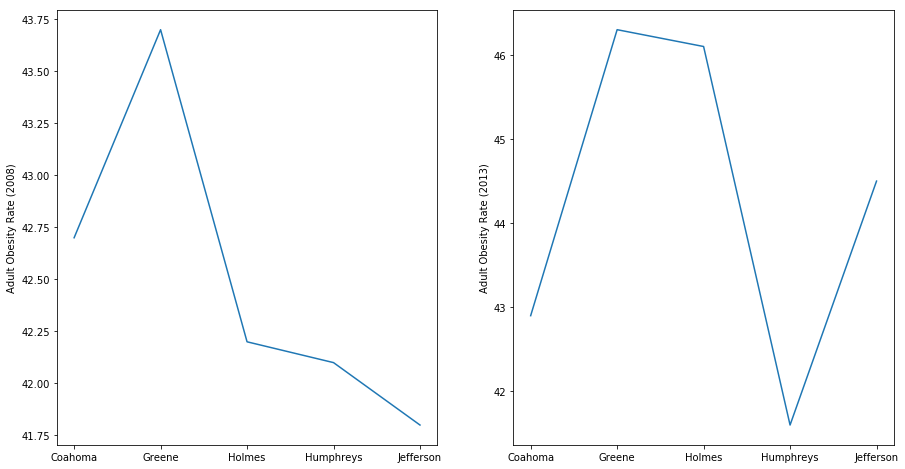

In [12]:
import seaborn as sns
f, axes = plt.subplots(1, 2, figsize = (15, 8))
sns.lineplot(x = ["Greene", "Coahoma", "Holmes", "Humphreys", "Jefferson"], y = "Adult Obesity Rate (2008)", data = df_top5, ax = axes[0])
sns.lineplot(x = ["Greene", "Coahoma", "Holmes", "Humphreys", "Jefferson"], y = "Adult Obesity Rate (2013)", data = df_top5, ax = axes[1])

Let's create some new columns showing the percent change in obesity and diabetes between 2008 and 2013:

In [13]:
perchng_diabetes = df_obes["Adult Diabetes Rate (2013)"].sub(df_obes["Adult Diabetes Rate (2008)"])
perchng_obesity = df_obes["Adult Obesity Rate (2013)"].sub(df_obes["Adult Obesity Rate (2008)"])
df_obes["% Change Diabetes Rate"] = perchng_diabetes
df_obes["% Change Obesity Rate"] = perchng_obesity
df_obes.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,FIPS,State,Adult Diabetes Rate (2008),Adult Diabetes Rate (2013),Adult Obesity Rate (2008),Adult Obesity Rate (2013),Recreation/Fitness Facilities (2009),Recreation/Fitness Facilities (2014),Recreation/Fitness Facilities % Change (2009-2014),% Change Diabetes Rate,% Change Obesity Rate
County,,,,,,,,,,,
Greene,1063,AL,18.2,21.0,43.7,46.3,0,0,0.0,2.8,2.6
Coahoma,28027,MS,15.9,16.8,42.7,42.9,1,1,0.0,0.9,0.2
Holmes,28051,MS,15.6,17.5,42.2,46.1,0,0,0.0,1.9,3.9
Humphreys,28053,MS,15.7,17.3,42.1,41.6,0,0,0.0,1.6,-0.5
Jefferson,28063,MS,15.3,16.9,41.8,44.5,0,0,0.0,1.6,2.7


Looking above, the highest increases in both diabetes and obesity came from Holmes, Jefferson, and Greene counties; based on this, and the fact that none of them have any fitness facilities, these are probably good contenders for opening a new fitness center.

Before going further, let's use k-means clustering and Folium to visualize how these counties compare to other counties in the US regarding the same statistics. For the sake of simplicity, we'll limit it to 50 other counties. First we make the original dataframe look just like our df_obes dataframe:

In [14]:
perchng_diabetes = df_health["Adult Diabetes Rate (2013)"].sub(df_health["Adult Diabetes Rate (2008)"])
perchng_obesity = df_health["Adult Obesity Rate (2013)"].sub(df_health["Adult Obesity Rate (2008)"])
df_health["% Change Diabetes Rate"] = perchng_diabetes
df_health["% Change Obesity Rate"] = perchng_obesity
df_health.head()

,FIPS,State,County,Adult Diabetes Rate (2008),Adult Diabetes Rate (2013),Adult Obesity Rate (2008),Adult Obesity Rate (2013),Recreation/Fitness Facilities (2009),Recreation/Fitness Facilities (2014),Recreation/Fitness Facilities % Change (2009-2014),% Change Diabetes Rate,% Change Obesity Rate
31,1063,AL,Greene,18.2,21.0,43.7,46.3,0,0,0.0,2.8,2.6
1414,28027,MS,Coahoma,15.9,16.8,42.7,42.9,1,1,0.0,0.9,0.2
1426,28051,MS,Holmes,15.6,17.5,42.2,46.1,0,0,0.0,1.9,3.9
1427,28053,MS,Humphreys,15.7,17.3,42.1,41.6,0,0,0.0,1.6,-0.5
1432,28063,MS,Jefferson,15.3,16.9,41.8,44.5,0,0,0.0,1.6,2.7


Now normalize and transform the data, and use k-means clustering to cluster counties:

In [15]:
from sklearn.preprocessing import StandardScaler

X = df_health.values[:50, 3:]
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.95210246,  1.63752308,  2.78408142,  1.89037095, -0.68009816,
        -0.6430171 , -0.02423716,  0.41139973,  0.383619  ],
       [ 0.86233652,  0.18655326,  2.18970024,  0.75721488, -0.14033772,
        -0.08869201, -0.02423716, -0.84934137, -0.54824902],
       [ 0.72019314,  0.42838157,  1.89250966,  1.82371471, -0.68009816,
        -0.6430171 , -0.02423716, -0.18579343,  0.88838085],
       [ 0.76757427,  0.35928776,  1.83307154,  0.32394932, -0.68009816,
        -0.6430171 , -0.02423716, -0.38485781, -0.82004386],
       [ 0.57804976,  0.22110016,  1.65475719,  1.2904648 , -0.68009816,
        -0.6430171 , -0.02423716, -0.38485781,  0.42244684],
       [ 0.05685735, -0.02072814,  1.59531907,  0.02399625, -0.68009816,
        -0.6430171 , -0.02423716, -0.11943863, -1.01418303],
       [-0.79600295, -0.15891574,  1.17925225,  0.75721488, -0.68009816,
        -0.6430171 , -0.02423716,  0.8095285 ,  0.11182416],
       [ 1.43091006,  1.05022577,  1.06037601,  1.42377728, -0

In [16]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
kmeans.fit(cluster_dataset)
labels = kmeans.labels_
labels

array([5, 1, 5, 1, 1, 1, 1, 5, 5, 5, 1, 5, 5, 1, 1, 0, 0, 2, 1, 1, 6, 6, 8,
       4, 3, 7, 4, 6, 4, 7, 2, 6, 2, 6, 2, 9, 3, 2, 2, 2, 6, 2, 9, 9, 2, 2,
       6, 7, 9, 4], dtype=int32)

We can insert the cluster labels into a new dataframe:

In [17]:
df_50 = df_health.head(50)
df_50.insert(0, "Cluster Labels", labels)
df_50

,Cluster Labels,FIPS,State,County,Adult Diabetes Rate (2008),Adult Diabetes Rate (2013),Adult Obesity Rate (2008),Adult Obesity Rate (2013),Recreation/Fitness Facilities (2009),Recreation/Fitness Facilities (2014),Recreation/Fitness Facilities % Change (2009-2014),% Change Diabetes Rate,% Change Obesity Rate
31,5,1063,AL,Greene,18.2,21.0,43.7,46.3,0,0,0.000000,2.8,2.6
1414,1,28027,MS,Coahoma,15.9,16.8,42.7,42.9,1,1,0.000000,0.9,0.2
1426,5,28051,MS,Holmes,15.6,17.5,42.2,46.1,0,0,0.000000,1.9,3.9
1427,1,28053,MS,Humphreys,15.7,17.3,42.1,41.6,0,0,0.000000,1.6,-0.5
1432,1,28063,MS,Jefferson,15.3,16.9,41.8,44.5,0,0,0.000000,1.6,2.7
1472,1,28143,MS,Tunica,14.2,16.2,41.7,40.7,0,0,0.000000,2.0,-1.0
2417,1,46113,SD,Shannon,12.4,15.8,41.0,42.9,0,0,0.000000,3.4,1.9
65,5,1131,AL,Wilcox,17.1,19.3,40.8,44.9,0,0,0.000000,2.2,4.1
59,5,1119,AL,Sumter,17.1,20.1,40.8,40.3,1,1,0.000000,3.0,-0.5
52,5,1105,AL,Perry,17.5,21.7,40.7,43.0,0,0,0.000000,4.2,2.3


Plot the clusters to see what they look like:

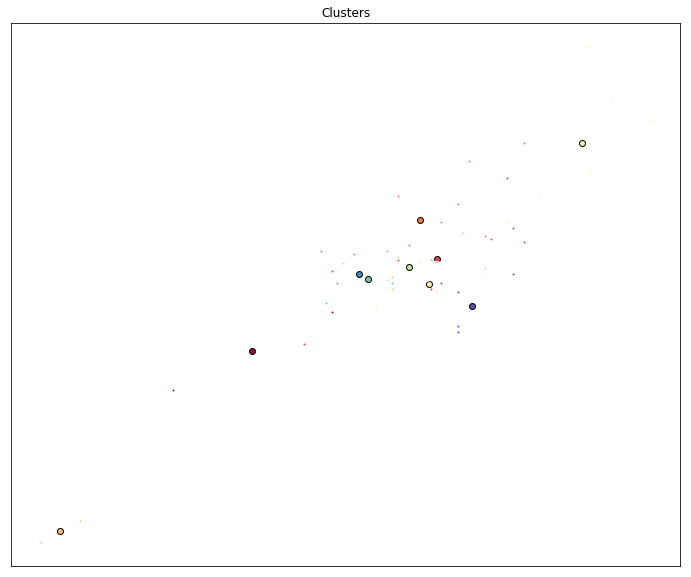

In [18]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-15, which will match the number of clusters in the dataset.
for k, col in zip(range(50), colors):

    # create a list of all datapoints, where the datapoints that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = kmeans.cluster_centers_[k]
    
    # plot the datapoints with color col.
    ax.plot(cluster_dataset[my_members, 0], cluster_dataset[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('Clusters')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

Next, we'll plot the clusters on a US map with Folium, but before we can do that, we need to get geographic data for each county. I've already gotten the data for each county (taken from each county's respective Wikipedia page) and put it into a list, this list is then converted to a dataframe:

In [19]:
county = df_50["County"].values
lat = [32.5108, 34.23, 33.12, 33.13, 31.73, 34.66, 43.33, 31.5906, 32.3530, 32.3809, 33.61, 32.09, 32.2307, 32.1929, 34.25, 46.23, 30.12, 33.62, 44.08, 45.72, 32.88, 45.16, 34.64, 31.18, 59.95, 33.79, 33.44, 34.60, 33.55, 35.20, 34.2325, 32.76, 31.16, 31.63, 32.0552, 32.78, 69.30, 32.1431, 31.5157, 44.98, 32.74, 33.22, 37.52, 31.48, 34.1715, 35.91, 31.48, 33.09, 36.26, 31.62]
long = [-87.5703, -90.60, -90.09, -90.52, -91.03, -90.38, -102.55, -87.1839, -88.1215, -87.1731, -90.60, -86.39, -85.4137, -87.0619, -90.29, -106.72, -90.50, -79.73, -99.20, -101.18, -90.81, -100.88, -79.11, -90.40, -158.43, -90.88, -80.80, -79.68, -90.30, -89.00, -90.5211, -88.65, -91.32, -89.55, -85.4302, -81.14, -153.45, -87.4722, -85.2346, -101.67, -90.99, -81.05, -83.32, -91.35, -91.5632, -77.60, -90.90, -89.58, -77.66, -89.17]

In [20]:
df_latlong = pd.DataFrame({"County" : county, "Latitude" : lat, "Longitude" : long})
df_latlong.head()

,County,Latitude,Longitude
0,Greene,32.5108,-87.5703
1,Coahoma,34.2300,-90.6000
2,Holmes,33.1200,-90.0900
3,Humphreys,33.1300,-90.5200
4,Jefferson,31.7300,-91.0300


Combine the dataframe that was just created with the previous dataframe:

In [28]:
df_final = df_50.merge(df_latlong, on = "County")
df_final.head()

,Cluster Labels,FIPS,State,County,Adult Diabetes Rate (2008),Adult Diabetes Rate (2013),Adult Obesity Rate (2008),Adult Obesity Rate (2013),Recreation/Fitness Facilities (2009),Recreation/Fitness Facilities (2014),Recreation/Fitness Facilities % Change (2009-2014),% Change Diabetes Rate,% Change Obesity Rate,Latitude,Longitude
0,5,1063,AL,Greene,18.2,21.0,43.7,46.3,0,0,0.0,2.8,2.6,32.5108,-87.5703
1,1,28027,MS,Coahoma,15.9,16.8,42.7,42.9,1,1,0.0,0.9,0.2,34.2300,-90.6000
2,5,28051,MS,Holmes,15.6,17.5,42.2,46.1,0,0,0.0,1.9,3.9,33.1200,-90.0900
3,1,28053,MS,Humphreys,15.7,17.3,42.1,41.6,0,0,0.0,1.6,-0.5,33.1300,-90.5200
4,1,28063,MS,Jefferson,15.3,16.9,41.8,44.5,0,0,0.0,1.6,2.7,31.7300,-91.0300


Now we can create a Folium map and visualize each cluster:

In [31]:
!conda install -c conda-forge folium --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    folium-0.9.1               |             py_0          59 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         574 KB

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.9.1-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge


branca-0.3.1         | 25 KB     | ###################################

# NOTE: The following Folium map does not render when opened in GitHub, it's a known GitHub issue. To see the map, open this notebook using: https://nbviewer.jupyter.org/

In [61]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

latitude = 37.0902
longitude = -95.7129

# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 5)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i * x) ** 2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, county, state, cluster in zip(df_final['Latitude'], df_final['Longitude'], df_final['County'], df_final["State"], df_final['Cluster Labels']):
    label = folium.Popup(str(county) + ', ' + str(state) + ' Cluster ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = rainbow[cluster - 1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

Analyzing the map, the vast majority of the top 50 counties are in the southern/southeastern United States. Let's use the FourSquare API to explore Greene County in Alabama which had the highest adult obesity rate in the country in 2008. We'll verify that there are currently no fitness centers in the area by putting the info from FourSquare into a dataframe:

In [36]:
# The code was removed by Watson Studio for sharing.

In [51]:
county_latitude = df_final.loc[0, "Latitude"]
county_longitude = df_final.loc[0, "Longitude"]
county_name = df_final.loc[0, "County"]
LIMIT = 100
radius = 100000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, county_latitude, county_longitude, VERSION, radius, LIMIT)

In [54]:
import requests
results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [58]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis = 1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Rather than scanning each individual row for a fitness center, let's automatically scan the dataframe for the presence of any fitness centers:

In [60]:
"Gym / Fitness Center" in nearby_venues.values

False

As we can see, there's still no fitness centers anywhere within a 100 kilometer radius in Greene County (100 kilometers is the maximum range FourSquare can search within).

Based on everything we've seen and analyzed, we can conclude that building a fitness center in Greene County, Alabama is an optimal location for a fitness center. However, there are still many other factors not discussed here that would need to be taken into consideration before deciding to build a fitness center here, such as average citizen income, crime levels in the area, county funding, and whether citizens actually <i>want</i> a fitness center nearby (among other factors). For these reasons, a list of the top counties analyzed here should be submitted to stakeholders, rather than only one single county.